# Brain Stroke Prediction

This is basically a classification problem. The aim of this study is to check how well it can be predicted if patient will have barin stroke based on the available health data such as glucose level, age, gender etc.

We'll check the data and perform some explanotary data analysis first, then process the data as needed. After preparing the data, we'll evaluate the performance of different algorithms and tune the hyperparameters of the one which is the most promissing. Finally we'll perform a prediction on the test data to check the overall performance of the chosen algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='whitegrid')

In [2]:
df = pd.read_csv('Data/full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Context

1. gender: "Male", "Female" or "Other"
2. age: age of the patient
3. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4. heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
5. evermarried: "No" or "Yes"
6. worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
7. Residencetype: "Rural" or "Urban"
8. avgglucoselevel: average glucose level in blood
9. bmi: body mass index
10. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

[Kaggle](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset)

## Exploratory Data Analysis

In [3]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4981.000000,4981.000000,4981.000000,4981,4981,4981,4981.000000,4981.000000,4981,4981.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2907,NaN,NaN,NaN,3280,2860,2532,NaN,NaN,1838,NaN
mean,NaN,43.419859,0.096165,0.055210,NaN,NaN,NaN,105.943562,28.498173,NaN,0.049789
std,NaN,22.662755,0.294848,0.228412,NaN,NaN,NaN,45.075373,6.790464,NaN,0.217531
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,14.000000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.230000,23.700000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.850000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,113.860000,32.600000,NaN,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
# hypertension, heart_disease and stroke should be object not int64

df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   object 
dtypes: float64(3), object(8)
memory usage: 428.2+ KB


In [6]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4981.000000,4981.0,4981.0,4981,4981,4981,4981.000000,4981.000000,4981,4981.0
unique,2,NaN,2.0,2.0,2,4,2,NaN,NaN,4,2.0
top,Female,NaN,0.0,0.0,Yes,Private,Urban,NaN,NaN,never smoked,0.0
freq,2907,NaN,4502.0,4706.0,3280,2860,2532,NaN,NaN,1838,4733.0
mean,NaN,43.419859,NaN,NaN,NaN,NaN,NaN,105.943562,28.498173,NaN,NaN
std,NaN,22.662755,NaN,NaN,NaN,NaN,NaN,45.075373,6.790464,NaN,NaN
min,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,55.120000,14.000000,NaN,NaN
25%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,77.230000,23.700000,NaN,NaN
50%,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,91.850000,28.100000,NaN,NaN
75%,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,113.860000,32.600000,NaN,NaN


In [7]:
def plot_cat_features(df):
  fig, ax = plt.subplots(2, 3, figsize=(18,12))

  sb.countplot(x='stroke', data=df, hue='gender', ax=ax[0,0])
  sb.countplot(x='stroke', data=df, hue='hypertension', ax=ax[0,1])
  sb.countplot(x='stroke', data=df, hue='heart_disease', ax=ax[0,2])
  sb.countplot(x='stroke', data=df, hue='ever_married', ax=ax[1,0])
  sb.countplot(x='stroke', data=df, hue='work_type', ax=ax[1,1])
  sb.countplot(x='stroke', data=df, hue='smoking_status', ax=ax[1,2])

  fig.suptitle('Bar graph showing the number of people who had or not Stroke', y=0.93, fontsize=22)

  plt.show()

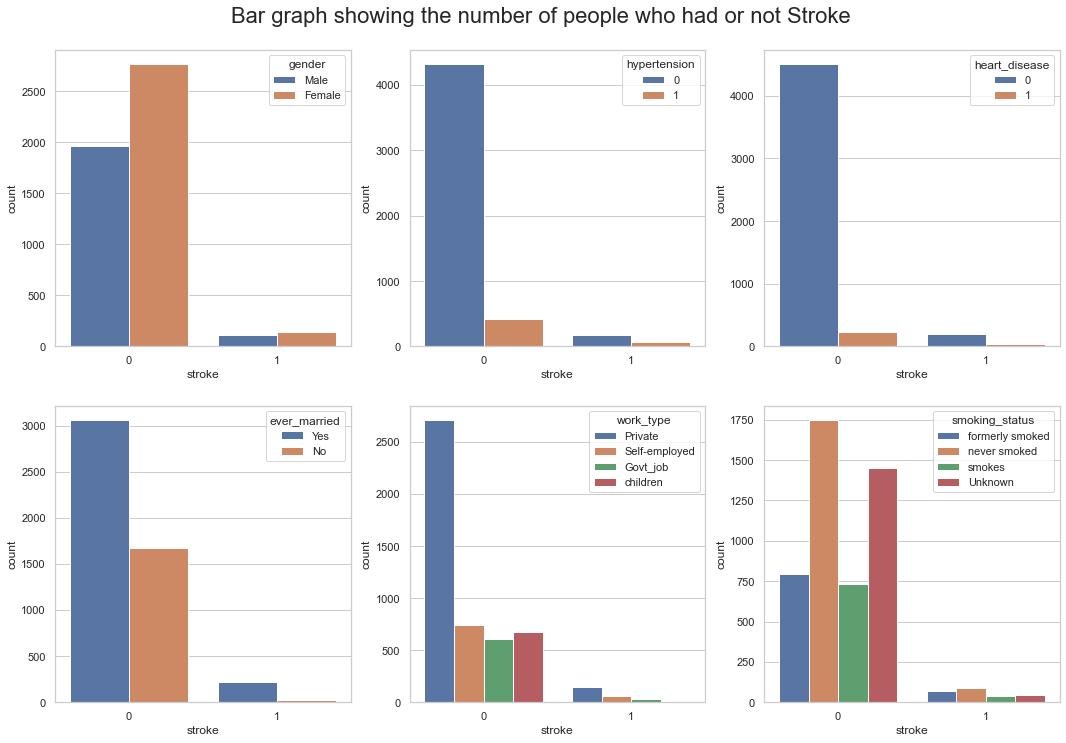

In [8]:
plot_cat_features(df)

In [9]:
def plot_nmr_features(df):
  fig, ax = plt.subplots(3, 2, figsize=(12, 18))

  sb.distplot(df['age'], label='Skewness: %.2f'%(df['age'].skew()), ax=ax[0,0])
  ax[0,0].legend(loc='best')
  sb.boxplot(df['age'], ax=ax[0,1])
  sb.distplot(df['avg_glucose_level'], label='Skewness: %.2f'%df['avg_glucose_level'].skew(), ax=ax[1,0])
  ax[1,0].legend(loc='best')
  sb.boxplot(df['avg_glucose_level'], ax=ax[1,1])
  sb.distplot(df['bmi'], label='Skewness: %.2f'%df['bmi'].skew(), ax=ax[2,0])
  ax[2,0].legend(loc='best')
  sb.boxplot(df['bmi'], ax=ax[2,1])

  fig.suptitle('Distribution of numerical features', y=0.93, fontsize=22)
  plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

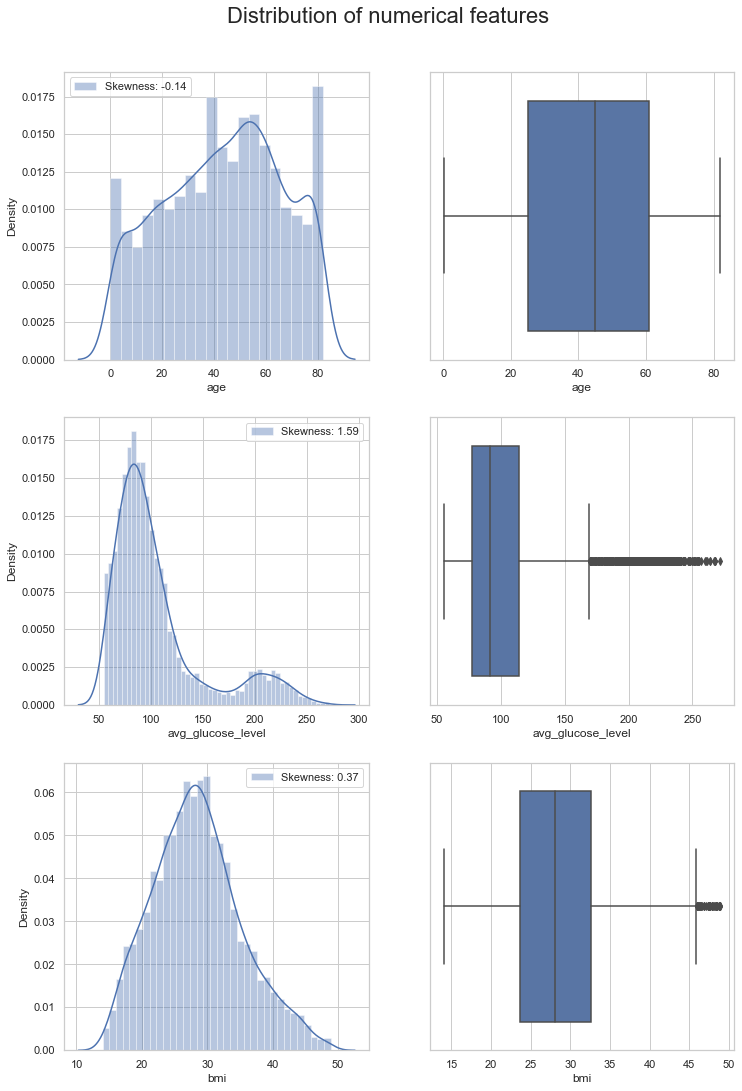

In [10]:
plot_nmr_features(df)

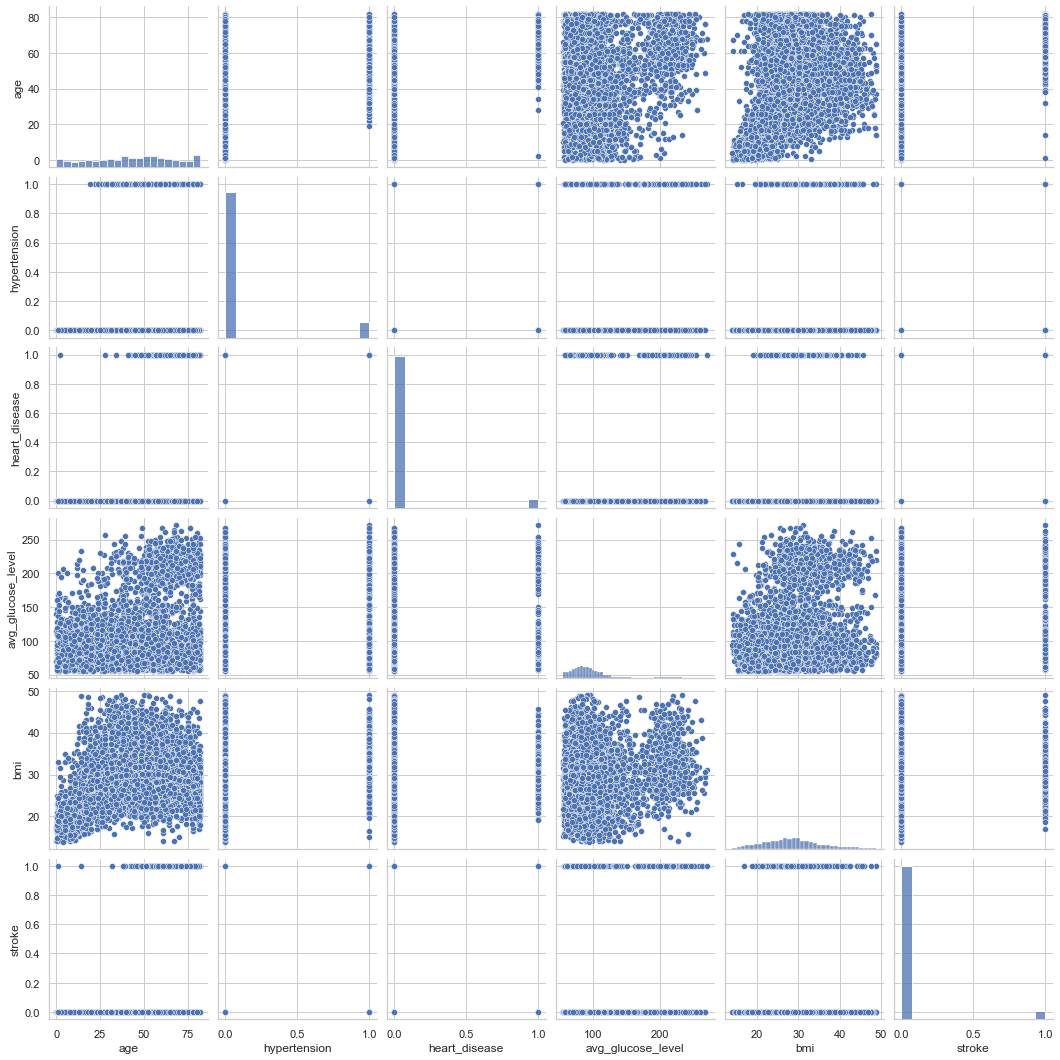

In [11]:
sb.pairplot(df)

In [12]:
print(df['stroke'].value_counts())

no_stroke = (df['stroke'].value_counts()[0] / len(df['stroke'])) * 100
had_stroke = (df['stroke'].value_counts()[1] / len(df['stroke'])) * 100
print('\nRatio of the people who had no stroke: %.2f%%' % no_stroke)
print('Ratio of the people who had stroke: %.2f%%' % had_stroke)

0    4733
1     248
Name: stroke, dtype: int64

Ratio of the people who had no stroke: 95.02%
Ratio of the people who had stroke: 4.98%


**Observations:** The dataset is in <ins>highly imbalanced</ins> state. One of the classes has only 4% of the entire dataset. Which means that either we should balance it by using some techniques such as under sampling of the majority class or SMOTE etc. or we should take Precision, Recall and F1-Score into considiration rather than accuracy as it might mislead us.

$Accuracy = \frac{True Positives + True Negative}{True Positives + True Negative + False Positive + False Negative}$

Considering that the 96% of the all classes are 0 which means that those people had not any brain stroke. Which also mean that event if we randomly estimate the class as 0 we'll be correct by 96% chances. That's why we also must check Precision, Recall and F1-Score.

*Precision calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. Maximizing the precision will minimize the false positives.*

$Precision = \frac{True Positives}{True Positives + False Positives)}$

*Recall predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. Maximizing recall will minimize false negatives.*

$Recall = \frac{True Positives}{(True Positives + False Negatives)}$

*The performance of a model can be summarized by a single score that averages both the precision and the recall, called the F-Measure. Maximizing the F-Measure will maximize both the precision and recall at the same time.*

$F-measure = \frac{(2 * Precision * Recall)}{Precision + Recall)}$

For further details please check [this post](https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/).


The distribution of the numerical values seem OK except avg_glucose_level which has alot of outliers too. We need to handle the outliers and transform it into normal distribution if needed.

## Data Processing
1. Check for null values and handle them
2. Remove outliers
3. Handle categorical features
4. Handle imbalanced target values
  1. Random undersampling
  2. Oversampling using SMOTE
5. Scale numeric features

In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

As can be seen on above list that there are no null values within the dataset.

Let's focus on the outliers based on the boxplots above.

In [14]:
data = df[(df['avg_glucose_level'] <= 160) & (df['bmi'] <= 45)]
data = data.reset_index(drop=True)
data.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4295,4295.000000,4295.0,4295.0,4295,4295,4295,4295.000000,4295.000000,4295,4295.0
unique,2,NaN,2.0,2.0,2,4,2,NaN,NaN,4,2.0
top,Female,NaN,0.0,0.0,Yes,Private,Urban,NaN,NaN,never smoked,0.0
freq,2540,NaN,3977.0,4123.0,2692,2446,2172,NaN,NaN,1559,4136.0
mean,NaN,41.104261,NaN,NaN,NaN,NaN,NaN,90.779090,27.793341,NaN,NaN
std,NaN,22.491501,NaN,NaN,NaN,NaN,NaN,21.588537,6.448618,NaN,NaN
min,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,55.120000,14.000000,NaN,NaN
25%,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,74.995000,23.200000,NaN,NaN
50%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,87.860000,27.600000,NaN,NaN
75%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,103.445000,31.900000,NaN,NaN


In [15]:
print(data['stroke'].value_counts())

no_stroke = (data['stroke'].value_counts()[0] / len(data['stroke'])) * 100
had_stroke = (data['stroke'].value_counts()[1] / len(data['stroke'])) * 100
print('\nRatio of the people who had no stroke: %.2f%%' % no_stroke)
print('Ratio of the people who had stroke: %.2f%%' % had_stroke)

0    4136
1     159
Name: stroke, dtype: int64

Ratio of the people who had no stroke: 96.30%
Ratio of the people who had stroke: 3.70%


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

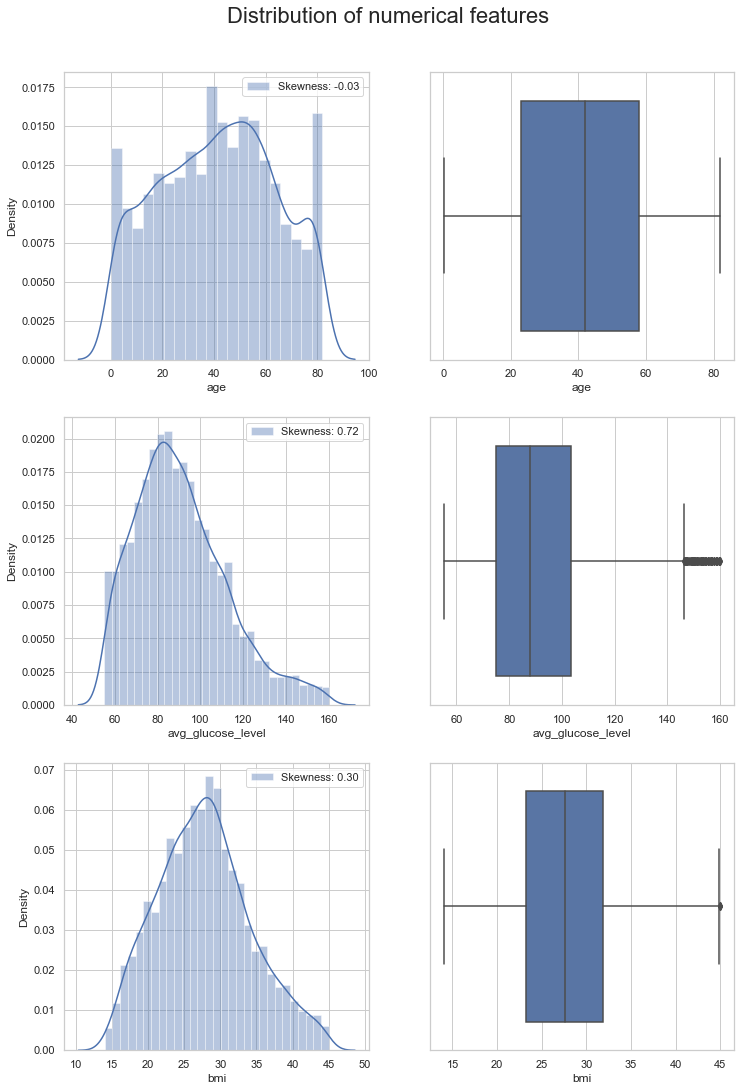

In [16]:
# Checking the impact of outlier removal on numerical features
plot_nmr_features(data)

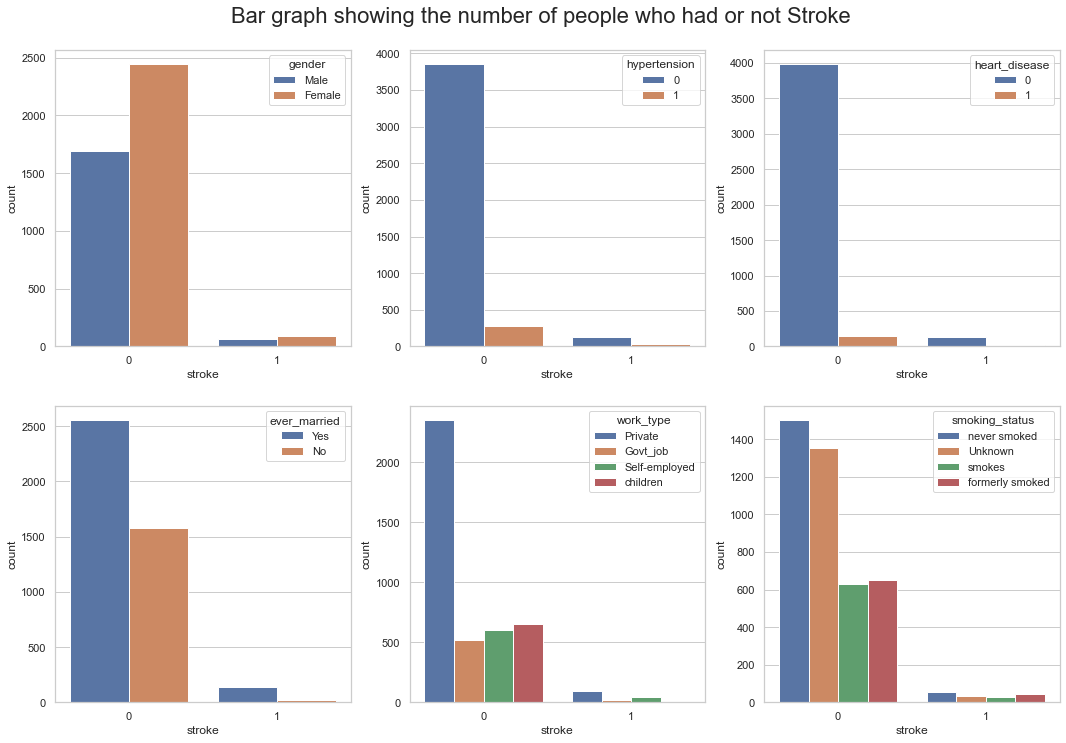

In [17]:
# Checking the impact of outlier removal on categorical features
plot_cat_features(data)

We handled the outliers as seen above however, the dataset is still in imbalanced state. We'll first try undersampling and check the performance of different algorithms, then we'll do the same thing for the over sampled dataset.

In [18]:
# List of the all features
features = data.drop('stroke', axis=1).columns
features

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [19]:
cat_features = [] # List of categorical features
nmr_features = [] # List of numerical features

for i in range(len(features)):
  if df.iloc[:, i].dtype == 'object':
     cat_features.append(df.columns[i])
  else:
    nmr_features.append(df.columns[i])

print('Categorical Features:', cat_features)
print('Numerical Features:', nmr_features)

Categorical Features: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numerical Features: ['age', 'avg_glucose_level', 'bmi']


In [20]:
# Handle categorical features
data = pd.get_dummies(data, columns=cat_features, drop_first=True)
data.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,age,avg_glucose_level,bmi,stroke,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,105.92,32.5,1,1,0,1,1,1,0,0,0,0,1,0
1,74.0,70.09,27.4,1,1,1,1,1,1,0,0,0,0,1,0
2,69.0,94.39,22.8,1,0,0,0,0,1,0,0,1,0,1,0
3,78.0,58.57,24.2,1,0,0,0,1,1,0,0,1,0,0,0
4,81.0,80.43,29.7,1,0,1,0,1,1,0,0,0,0,1,0


In [21]:
x = data.drop('stroke', axis=1)
y = data['stroke'].astype('int')

In [22]:
# Randomly delete examples in the majority class using RandomUnderSampler package.
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5) # Number of the items in the minority class will be 50% of the majority class

x_under, y_under = undersample.fit_resample(x, y)
print('x under sampled shape: ', x_under.shape)
print('y under sampled shape: ', y_under.shape)

x under sampled shape:  (477, 14)
y under sampled shape:  (477,)


In [23]:
# Check the ratio of classes after undersampling
pd.DataFrame(y_under).value_counts()

stroke
0         318
1         159
dtype: int64

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_48472/3021803999.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_result_row, ignore_index=True)
/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_48472/3021803999.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_result_row, ignore_index=True)
/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_48472/3021803999.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_result_row, ignore_index=True)
/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_48472/3021803999.py:43: FutureWarning: The frame.append method is deprecated and will be rem

          Acc Mean Acc STD Pre Mean Pre STD Rec Mean Rec STD F1 Mean F1 STD
Algorithm                                                                  
SVC          0.769   0.035    0.671   0.063    0.617   0.074   0.640  0.053
DTC          0.698   0.064    0.557   0.105    0.547   0.110   0.546  0.089
KNN          0.738   0.059    0.614   0.093    0.560   0.147   0.580  0.116
LDA          0.767   0.053    0.661   0.093    0.635   0.084   0.645  0.077
GNB          0.722   0.069    0.561   0.078    0.762   0.124   0.645  0.090


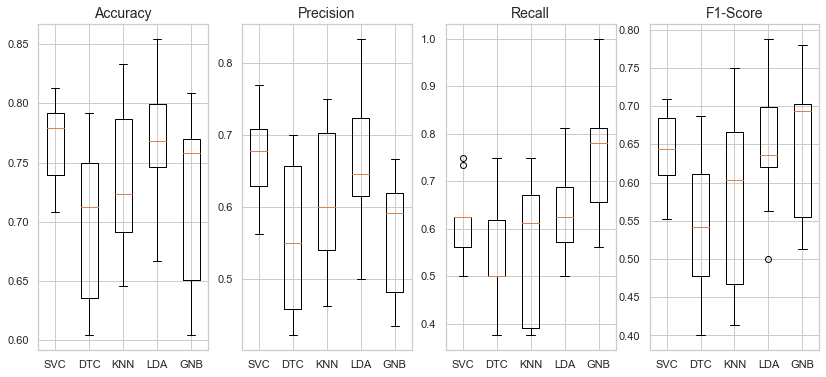

In [29]:
model_evaluation(x_under, y_under)

**Observation:** It seems that Linear Discriminant Analysis has the highest mean accuracy with a least standart deviation. Also it has the highest mean precision and F1 scores. It's better to focus on that one for hyper-parameter tuning. 

However, it's better to check if we can achive better results with oversampling first. We'll apply Synthetic Minority Oversampling Technique aka SMOTE. *SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.* For further details please check [this article](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
oversampling = SMOTE(sampling_strategy=0.5)
x_over, y_over = oversampling.fit_resample(x, y)
print('x over sampled shape: ', x_over.shape)
print('y over sampled shape: ', y_over.shape)
# Check the ratio of classes after over sampling
print(pd.DataFrame(y_over).value_counts())

x over sampled shape:  (6204, 14)
y over sampled shape:  (6204,)
stroke
0         4136
1         2068
dtype: int64


/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_48472/3021803999.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_result_row, ignore_index=True)
/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_48472/3021803999.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_result_row, ignore_index=True)
/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_48472/3021803999.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_result_row, ignore_index=True)
/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_48472/3021803999.py:43: FutureWarning: The frame.append method is deprecated and will be rem

          Acc Mean Acc STD Pre Mean Pre STD Rec Mean Rec STD F1 Mean F1 STD
Algorithm                                                                  
SVC          0.780   0.005    0.694   0.010    0.607   0.024   0.647  0.013
DTC          0.919   0.012    0.862   0.026    0.904   0.022   0.882  0.016
KNN          0.899   0.013    0.788   0.020    0.955   0.016   0.863  0.016
LDA          0.868   0.009    0.823   0.019    0.771   0.028   0.795  0.015
GNB          0.741   0.016    0.569   0.015    0.921   0.016   0.704  0.016


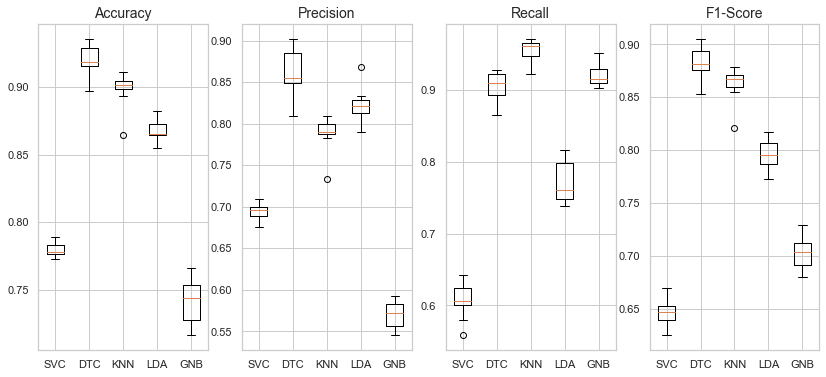

In [30]:
model_evaluation(x_over, y_over)

**Observation:** Decision Tree has the highest mean accuracy, precision and the F1-Score. It's worth to try hyper parameter tuning for this algorithm with the oversampled dataset 

## Modelling 

In [27]:
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 

from sklearn.model_selection import StratifiedKFold # For imbalanced datasets
from sklearn.model_selection import KFold           # For balanced datasets
from sklearn.model_selection import cross_validate

### Model Selection

In [28]:
def model_evaluation(x, y):
    models = []
    names = []
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    models.append(('SVC', SVC()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('GNB', GaussianNB()))

    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD', 'Pre Mean', 'Pre STD', 
                                       'Rec Mean', 'Rec STD', 'F1 Mean', 'F1 STD'])
    results_acc = []
    results_pre = []
    results_rec = []
    results_f1 = []
    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
    
        # Accuracy
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()

        # Precision
        pre_mean = result['test_precision'].mean()
        pre_std = result['test_precision'].std()

        # Recall
        rec_mean = result['test_recall'].mean()
        rec_std = result['test_recall'].std()

        #F1-Score
        f1_mean = result['test_f1'].mean()
        f1_std = result['test_f1'].std()

        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std, 'Pre Mean': pre_mean, 
                         'Pre STD': pre_std, 'Rec Mean': rec_mean, 'Rec STD': rec_std, 'F1 Mean': f1_mean, 
                         'F1 STD': f1_std}
        
        df_results = df_results.append(df_result_row, ignore_index=True)
        results_acc.append(result['test_accuracy'])
        results_pre.append(result['test_precision'])
        results_rec.append(result['test_recall'])
        results_f1.append(result['test_f1'])

    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # Display the overall results in a boxplot graph
    plot_objects = plt.subplots(nrows=1, ncols=4, figsize=(14, 6))
    fig, (ax1, ax2, ax3, ax4) = plot_objects
    
    ax1.boxplot(results_acc)
    ax1.set_title('Accuracy', fontsize=14)
    ax1.set_xticklabels(names)
    ax2.boxplot(results_pre)
    ax2.set_title('Precision', fontsize=14)
    ax2.set_xticklabels(names)
    ax3.boxplot(results_rec)
    ax3.set_title('Recall', fontsize=14)
    ax3.set_xticklabels(names)
    ax4.boxplot(results_f1)
    ax4.set_title('F1-Score', fontsize=14)
    ax4.set_xticklabels(names)

    plt.show()


### Hyperparameter Tuning for Decision Tree Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, shuffle=True, random_state=101)

In [33]:
h_parameters = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.01, 0.001],
              'max_depth': [5, 6, 7, 8],
              'criterion': ['gini', 'entropy']}
model = DecisionTreeClassifier()

kfold = KFold(n_splits=5, shuffle=True, random_state=101)
grid = GridSearchCV(estimator=model, param_grid=h_parameters, cv=kfold)
grid.fit(x_train, y_train)

print('Best score:', grid.best_score_)
print('Best parameters: ', grid.best_params_)

Best score: 0.8519064905954584
Best parameters:  {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


### Model Training

In [34]:
model = DecisionTreeClassifier(max_features='log2', max_depth=8, criterion='gini', ccp_alpha=0.001)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='log2')

In [35]:
y_hat = model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy score: %.1f%%" % (accuracy_score(y_test, y_hat)*100))
print('Precision score: %.3f' % precision_score(y_test, y_hat))
print('Recall: %.3f' % recall_score(y_test, y_hat))
print('F1-Score: %.3f' % f1_score(y_test, y_hat))

Accuracy score: 83.1%
Precision score: 0.700
Recall: 0.808
F1-Score: 0.750


Prediction accuracy of the model is 83.1%

Let's check the [confusion matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62).

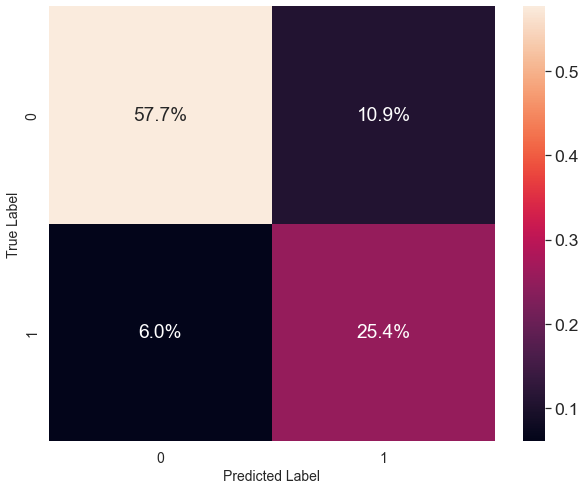

In [37]:
cf_matrix = confusion_matrix(y_test, y_hat)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Results

When we used Random Undersampling method to balance the dataset the SVC has mean accuracy 76.9%. Then we applied SMOTE to generate new data to make the dataset balanced, the DTC has mean accuracy 91.9% which is 15% more than SVC.

When we test the DTC model with the hyperparamters detected using GridSearch we reached to 83.1% prediction accuracy. 